Implement anomaly detection for given credit card dataset using Autoencoder and build the model by using the following steps: a. Import required libraries b. Upload / access the dataset c. Encoder converts it into latent representation d. Decoder networks convert it back to the original input e. Compile the models with Optimizer, Loss, and Evaluation Metrics

Dataset Shape: (27819, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

     

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,598 (14.05 KB)

 Trainable params: 3,598 (14.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.9314 - mse: 0.9314 - val_loss: 0.9352 - val_mse: 0.9352
Epoch 2/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8271 - mse: 0.8271 - val_loss: 0.8569 - val_mse: 0.8569
Epoch 3/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7620 - mse: 0.7620 - val_loss: 0.8018 - val_mse: 0.8018
Epoch 4/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6915 - mse: 0.6915 - val_loss: 0.7731 - val_mse: 0.7731
Epoch 5/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6502 - mse: 0.6502 - val_loss: 0.7478 - val_mse: 0.7478
Epoch 6/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6297 - mse: 0.6297 - val_loss: 0.7227 - val_mse: 0.7227
Epoch 7/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6096 - mse: 0.6096 - val_loss: 0.6979 - val_mse: 0.6979
Epoch 8/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5628 - mse: 0.5628 - val_loss: 0.6737 - val_mse: 0.6737
Epoch 9/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

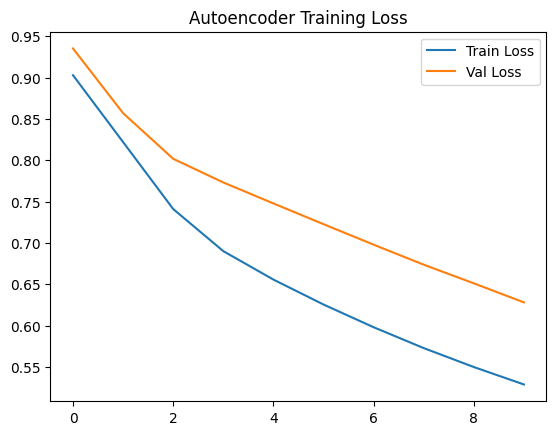

In [ ]:
# ============================================================
# a. IMPORT REQUIRED LIBRARIES
# ============================================================
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt


# ============================================================
# b. LOAD THE LOCAL CSV FILE
# ============================================================
df = pd.read_csv("creditcard.csv")   # <-- your dataset is local

print("Dataset Shape:", df.shape)
print(df.head())


# ============================================================
# c. PREPROCESSING + CLEANING
# ============================================================

# Remove any NaN / inf (safety patch)
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

# Extract labels
y = df["Class"].values
df = df.drop("Class", axis=1)

# Scale features
#Neural networks train faster on normalized data (gradients are more stable).
scaler = StandardScaler()
X = scaler.fit_transform(df)

# FIX: Convert any numeric issue to sane values
X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)


# ============================================================
# d. BUILD AUTOENCODER
# ============================================================

input_dim = X.shape[1]
encoding_dim = 16


#Encoder (compresses input → latent):

# Input(shape=(input_dim,)) — accepts flattened credit card features (e.g., 30 dimensions).
# Dense(32, relu) — compresses to 32 neurons; learns general patterns.
# Dense(16, relu) — further compresses to 16 neurons; extracts core features.
# latent = Dense(encoding_dim, relu) — final bottleneck layer (e.g., 16 → 16 or smaller); this is the compressed representation that captures "essence" of normal transactions.
# Decoder (reconstructs latent → output):

# Dense(16, relu) — expands from latent back to 16 neurons.
# Dense(32, relu) — further expands to 32 neurons.
# output_layer = Dense(input_dim, activation='linear') — reconstructs original feature dimension; linear activation (no ReLU) because output must match input range (can be negative or unbounded).

# Encoder
input_layer = Input(shape=(input_dim,))
x = Dense(32, activation='relu')(input_layer)
x = Dense(16, activation='relu')(x)
latent = Dense(encoding_dim, activation='relu')(x)

# Decoder
x = Dense(16, activation='relu')(latent)
x = Dense(32, activation='relu')(x)
output_layer = Dense(input_dim, activation='linear')(x)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.summary()


# ============================================================
# e. COMPILE WITH SAFE LEARNING RATE (no NaN)
# ============================================================
autoencoder.compile(
    optimizer=Adam(learning_rate=1e-4),   # <-- Important fix
    loss="mse",
    metrics=["mse"]
)


# ============================================================
# f. TRAIN ON ONLY NORMAL DATA
# ============================================================

X_normal = X[y == 0]  # train only on non-fraud

history = autoencoder.fit(
    X_normal, X_normal,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


# ============================================================
# g. RECONSTRUCTION + ANOMALY DETECTION
# ============================================================

# Predict reconstruction
reconstruct = autoencoder.predict(X)
reconstruct = np.nan_to_num(reconstruct)

# Compute reconstruction loss
loss = np.mean((X - reconstruct)**2, axis=1)
loss = np.nan_to_num(loss)

# Threshold: mean + 3*std
threshold = np.mean(loss) + 3*np.std(loss)
print("\nReconstruction Threshold:", threshold)

# Predict: fraud = 1 if loss > threshold
y_pred = (loss > threshold).astype(int)


# ============================================================
# h. PERFORMANCE REPORT
# ============================================================
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y, y_pred))

print("ROC-AUC Score:", roc_auc_score(y, loss))


# ============================================================
# i. PLOT TRAINING LOSS
# ============================================================
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Autoencoder Training Loss")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("\n=== ACCURACY METRICS ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print("\n=== CONFUSION MATRIX ===")
print(cm)
print(f"True Negatives:  {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives:  {cm[1,1]}")

✅ 2) Core Autoencoder Theory (10 lines, technical format)

An autoencoder is a neural network trained to copy its input to its output.

It compresses data through an encoder into a low-dimensional latent space.

The decoder expands the latent vector back to original dimensions.

Training minimizes reconstruction error (input − output).

For anomaly detection, the model learns only normal data patterns.

When given abnormal data (fraud), the reconstruction becomes poor, creating high error.

Fraud samples show significantly higher MSE compared to genuine samples.

A threshold (mean + 3*std) separates normal vs anomaly.

Autoencoders are unsupervised — they don’t need labels for training.

They work well when anomalies are rare (credit card fraud scenario).

✅ 3) Code explained in chunks (clean + simple)
✅ (a) Import + load dataset

Keras + sklearn + pandas for full ML pipeline.

creditcard.csv loaded from disk.

✅ (b) Preprocessing phase

Removes NaN / inf to avoid exploding gradients.

Splits out label “Class” (0 = normal, 1 = fraud).

StandardScaler makes every feature mean=0, std=1.

Converts any remaining NaN to 0 for safety.

✅ (c) Building Encoder
input_layer → Dense(32) → Dense(16) → Dense(encoding_dim)


Gradually compresses the feature space.

latent is the compressed representation.

✅ (d) Building Decoder
latent → Dense(16) → Dense(32) → Dense(input_dim)


Reconstructs original features.

Output layer uses linear activation for numeric features.

✅ (e) Compile
optimizer = Adam(1e-4)
loss = mse


Low LR avoids NaN issues because financial datasets can be noisy.

✅ (f) Train only on normal data
X_normal = X[y == 0]
autoencoder.fit(X_normal, X_normal)


Learns only normal patterns.

Fraud samples never seen → high error later.

✅ (g) Reconstruction + anomaly detection

Predict reconstruction for ALL samples.

Compute MSE per sample.

Use threshold = mean + 3*std to detect anomalies.

✅ (h) Evaluate

classification_report

ROC-AUC score

Best metric for fraud detection.

✅ (i) Plot

Visualizes how quickly the autoencoder learned to reconstruct.